https://github.com/datosgcba/test_alerta_noviazgo_violento

Importando librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Cargando datos

In [2]:
datos_17 = pd.read_csv("resultados-del-test-2017-18.csv")
datos_18 = pd.read_csv("resultados-del-test-2018-19.csv")

In [3]:
datos_17

,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13
0,2019-01-23,17:31:00,21,Hombre,Villa Riachuelo,B,C,B,C,C,C,B,C,C,C,A,B,C
1,2019-01-23,13:59:00,20,Mujer,Otro,B,B,B,B,A,B,B,B,C,C,B,B,B
2,2019-01-23,10:24:00,63,Mujer,Floresta,B,C,C,C,C,C,C,C,C,C,C,C,C
3,2019-01-23,00:20:00,30,Mujer,Otro,B,A,B,A,B,B,B,B,B,B,B,A,C
4,2019-01-22,23:44:00,27,Mujer,Caballito,B,C,B,B,C,C,C,C,B,C,C,C,C
5,2019-01-22,17:06:00,26,Mujer,Palermo,B,C,C,C,C,C,C,C,C,C,C,C,C
6,2019-01-22,16:45:00,16,Mujer,Balvanera,B,C,B,C,B,C,B,C,B,B,B,B,B
7,2019-01-22,01:30:00,20,Mujer,Barracas,A,A,B,B,A,A,A,B,B,C,A,B,B
8,2019-01-21,22:21:00,32,Mujer,Balvanera,C,B,B,A,A,A,B,C,B,C,B,A,C
9,2019-01-21,18:21:00,27,Mujer,Almagro,B,B,A,A,C,A,A,B,B,C,B,C,C


In [13]:
(datos_18 == datos_17).isna().sum()

fecha          0
hora           0
edad           0
genero         0
barrio         0
pregunta_1     0
pregunta_2     0
pregunta_3     0
pregunta_4     0
pregunta_5     0
pregunta_6     0
pregunta_7     0
pregunta_8     0
pregunta_9     0
pregunta_10    0
pregunta_11    0
pregunta_12    0
pregunta_13    0
dtype: int64

Verificamos valores faltantes

In [5]:
print(datos_17.isna().sum().sum(),datos_18.isna().sum().sum())

0 0


Verificamos las propiedades de los datos categoricos

In [6]:
print(list(datos_17.columns))

['fecha', 'hora', 'edad', 'genero', 'barrio', 'pregunta_1', 'pregunta_2', 'pregunta_3', 'pregunta_4', 'pregunta_5', 'pregunta_6', 'pregunta_7', 'pregunta_8', 'pregunta_9', 'pregunta_10', 'pregunta_11', 'pregunta_12', 'pregunta_13']


In [7]:
Numericas = ["fecha","hora","edad"]
Categoricas = datos_18.columns.drop(Numericas)
for i in Categoricas:
    print(i.capitalize()+":")
    print(datos_17[i].unique())
    print("- - - - - - - \n")

Genero:
['Hombre' 'Mujer' 'Otro']
- - - - - - - 

Barrio:
['Villa Riachuelo' 'Otro' 'Floresta' 'Caballito' 'Palermo' 'Balvanera'
 'Barracas' 'Almagro' 'Nuñez' 'Boedo' 'Villa Urquiza' 'Agronomia'
 'Montserrat' 'San Cristóbal' 'Flores' 'Belgrano' 'Coghlan' 'Monte Castro'
 'Villa General Mitre' 'Recoleta' 'La Boca' 'Villa Real' 'Parque Chas'
 'Parque Chacabuco' 'Villa Pueyrredón' 'Puerto Madero' 'Villa Crespo'
 'Parque Patricios' 'Saavedra' 'Villa del Parque' 'Mataderos'
 'San Nicolás' 'Villa Soldati' 'Villa Luro' 'Chacarita' 'San Telmo'
 'Nueva Pompeya' 'Villa Devoto' 'Colegiales' 'Liniers' 'Constitución'
 'Villa Lugano' 'Retiro' 'La Paternal' 'Villa Ortúzar' 'Versalles'
 'Parque Avellaneda' 'Vélez Sarsfield']
- - - - - - - 

Pregunta_1:
['B' 'A' 'C']
- - - - - - - 

Pregunta_2:
['C' 'B' 'A']
- - - - - - - 

Pregunta_3:
['B' 'C' 'A']
- - - - - - - 

Pregunta_4:
['C' 'B' 'A']
- - - - - - - 

Pregunta_5:
['C' 'A' 'B']
- - - - - - - 

Pregunta_6:
['C' 'B' 'A']
- - - - - - - 

Pregunta_7:
['

Mostramos algunas graficas acerca de las variables solas

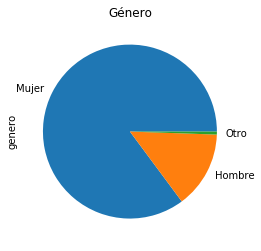

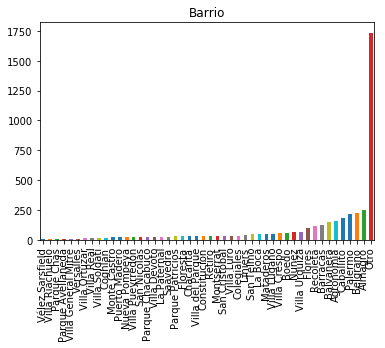

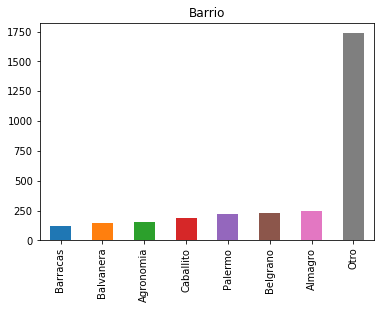

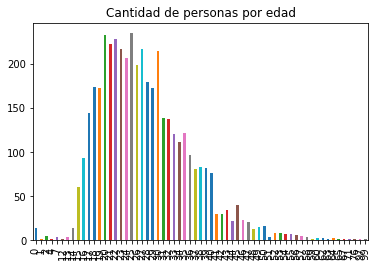

In [8]:
datos_18["genero"].value_counts().plot("pie", title = "Género")
plt.show()
datos_18["barrio"].value_counts().sort_values().plot("bar", title = "Barrio")
plt.show()
datos_18["barrio"].value_counts().sort_values().iloc[-8:].plot("bar", title = "Barrio")
plt.show()
datos_18["edad"].value_counts().sort_index().plot("bar", title = "Cantidad de personas por edad")
plt.xticks(rotation = "vertical")
plt.show()


In [9]:
tests = [datos_17,datos_18]
mujeres = []
for i in tests:
    datos = i[i["genero"]=="Mujer"]
    mujeres.append(datos.copy())


In [10]:
datos_17

,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13
0,2019-01-23,17:31:00,21,Hombre,Villa Riachuelo,B,C,B,C,C,C,B,C,C,C,A,B,C
1,2019-01-23,13:59:00,20,Mujer,Otro,B,B,B,B,A,B,B,B,C,C,B,B,B
2,2019-01-23,10:24:00,63,Mujer,Floresta,B,C,C,C,C,C,C,C,C,C,C,C,C
3,2019-01-23,00:20:00,30,Mujer,Otro,B,A,B,A,B,B,B,B,B,B,B,A,C
4,2019-01-22,23:44:00,27,Mujer,Caballito,B,C,B,B,C,C,C,C,B,C,C,C,C
5,2019-01-22,17:06:00,26,Mujer,Palermo,B,C,C,C,C,C,C,C,C,C,C,C,C
6,2019-01-22,16:45:00,16,Mujer,Balvanera,B,C,B,C,B,C,B,C,B,B,B,B,B
7,2019-01-22,01:30:00,20,Mujer,Barracas,A,A,B,B,A,A,A,B,B,C,A,B,B
8,2019-01-21,22:21:00,32,Mujer,Balvanera,C,B,B,A,A,A,B,C,B,C,B,A,C
9,2019-01-21,18:21:00,27,Mujer,Almagro,B,B,A,A,C,A,A,B,B,C,B,C,C


In [11]:
datos_18

,fecha,hora,edad,genero,barrio,pregunta_1,pregunta_2,pregunta_3,pregunta_4,pregunta_5,pregunta_6,pregunta_7,pregunta_8,pregunta_9,pregunta_10,pregunta_11,pregunta_12,pregunta_13
0,2019-01-23,17:31:00,21,Hombre,Villa Riachuelo,B,C,B,C,C,C,B,C,C,C,A,B,C
1,2019-01-23,13:59:00,20,Mujer,Otro,B,B,B,B,A,B,B,B,C,C,B,B,B
2,2019-01-23,10:24:00,63,Mujer,Floresta,B,C,C,C,C,C,C,C,C,C,C,C,C
3,2019-01-23,00:20:00,30,Mujer,Otro,B,A,B,A,B,B,B,B,B,B,B,A,C
4,2019-01-22,23:44:00,27,Mujer,Caballito,B,C,B,B,C,C,C,C,B,C,C,C,C
5,2019-01-22,17:06:00,26,Mujer,Palermo,B,C,C,C,C,C,C,C,C,C,C,C,C
6,2019-01-22,16:45:00,16,Mujer,Balvanera,B,C,B,C,B,C,B,C,B,B,B,B,B
7,2019-01-22,01:30:00,20,Mujer,Barracas,A,A,B,B,A,A,A,B,B,C,A,B,B
8,2019-01-21,22:21:00,32,Mujer,Balvanera,C,B,B,A,A,A,B,C,B,C,B,A,C
9,2019-01-21,18:21:00,27,Mujer,Almagro,B,B,A,A,C,A,A,B,B,C,B,C,C
